In [1]:
import numpy as np
from algo import numf, get_neighbors
import matplotlib.pyplot as plt

In [2]:
def gauss(x, sigma=1, mean=0, scale=1):
    return scale * np.exp(-np.square(x - mean) / (2 * sigma ** 2))

m = 50
r = 3
p1 = 12
p2 = 25
p3 = 38

x = np.linspace(1, m, m).reshape(-1, 1)
w1 = gauss(x, sigma=2, mean=p1)
w2 = np.concatenate((np.zeros((int((m-25)/2), 1)), np.ones((p2, 1)), np.zeros((int((m-25)/2)+1, 1))))
w3 = gauss(x, sigma=2, mean=p3)
Wtrue = np.hstack((w1, w2, w3))


n = 6
c = 1/np.sqrt(r-1)
e = 0.001
Htrue = np.array([[c + e, 1-c-e, 0],
                  [1-c-e, c+e, 0],
                  [c+e, 0, 1-c-e],
                  [1-c-e, 0, c+e],
                  [0, c+e, 1-c-e],
                  [0, 1-c-e, c+e]]).T

M = Wtrue @ Htrue

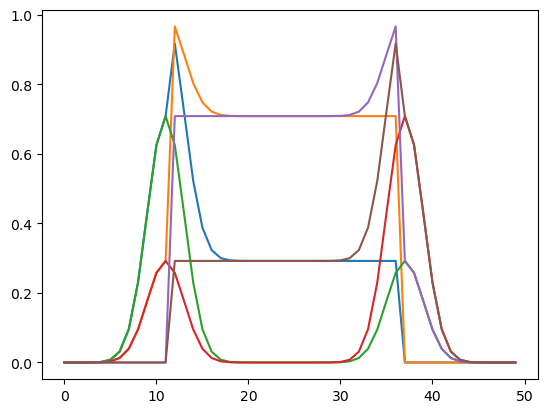

In [3]:
plt.plot(M)

In [4]:
W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

In [5]:
pvals = get_neighbors([p1, p2, p3], m, 1)
pvals

[37, 39, 11, 13, 24, 26]

In [6]:
W, H, pouts = numf(M, W0, H0, pvals, iters=20)

0 0.9601368203767324
1 0.7169376682006487
2 0.3312677913070709
3 0.27998988191369273
4 0.24806723790020074
5 0.207157490764489
6 0.17820766569323593
7 0.15724786808310132
8 0.13833065985898677
9 0.11995802251736166
10 0.10257652363283534
11 0.08677745076069146
12 0.07311506676314697
13 0.06181675232222626
14 0.05255771720990541
15 0.04501551970917608
16 0.03890634971975364
17 0.03391321889042651
18 0.02978852173641864
19 0.026333581286372625


In [7]:
from multigrid import create_R, get_fine_p

R1 = create_R(m)

In [8]:
W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

W1, H1, pouts1 = numf(R1 @ M, R1 @ W0, H0, iters=20)

0 0.8971623196119362
1 0.4148751594064653
2 0.28655893657924514
3 0.2157270714134601
4 0.19161821011871927
5 0.1780011679735171
6 0.166377964829569
7 0.15542452261328388
8 0.14459477785437325
9 0.133715125966944
10 0.12246667699186636
11 0.11095321563775402
12 0.09964166707237472
13 0.08900121640982021
14 0.07948138429171533
15 0.07142307296889248
16 0.06480234857540615
17 0.059058298209389876
18 0.05392428927287403
19 0.049198743533502155


In [12]:
pvals = get_fine_p(pouts1)
pvals = get_neighbors(pvals, m, 5)
pvals

[33, 35, 5, 37, 7, 39, 9, 11, 13, 15, 17, 19, 29, 31]

In [13]:
W2, H2, pouts2 = numf(M, W0, H0, pvals=pvals, iters=16)

0 0.9516180025404938
1 0.7419774985142092
2 0.32903295730663173
3 0.17226081367278503
4 0.10554890600605718
5 0.07823087468882903
6 0.05747715918509981
7 0.04281155526252714
8 0.03379288401040943
9 0.02806360307891117
10 0.023827838470063655
11 0.02045151715324389
12 0.01763249265762392
13 0.015251387385943095
14 0.013226868454681904
15 0.011500155387475284


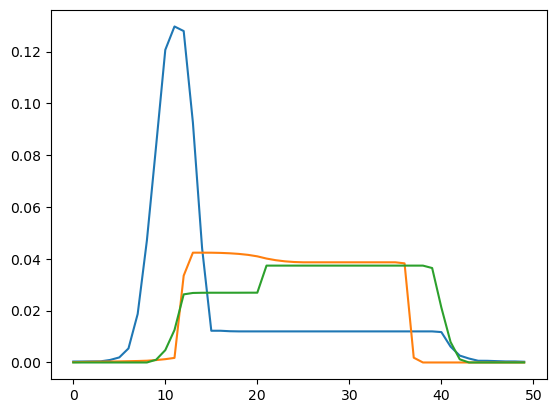

In [28]:
plt.plot(W2)